---------- Classification problem where Target variable is classified as Healthy or chances to Bankruptcy  --------------

In [ ]:
#importing the basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#data sample
data = pd.read_csv('/content/drive/MyDrive/BANKRUPTCY PREDICTION .csv')
data.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.370594          
1                                           0.464291          
2                                           0.426071          
3                                           0.399844          
4                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)  ...   Net Income to Total Assets  \
0                               0.780985  ...                     0.716845   
1                               0.781506  ...                     0.795297   
2                               0.780284  ...                     0.774670   
3                               0.781241  ...                     0.739555   
4                               0.781550  ...                     0.795016   

    Total assets to GNP price   No-credit Interval   Gross Profit to Sales  \
0                    0.009219             0.622879                0.601453   
1                    0.008323             0.623652                0.610237   
2                    0.040003             0.623841                0.601449   
3                    0.003252             0.622929                0.583538   
4                    0.003878             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Equity to Liability  \
0                                           0.564050                0.016469   
1                                           0.570175                0.020794  

In [ ]:
#checking the null values and data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    ROA(A) before interest and % after tax                   6819 non-null   float64
 2    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 3    Operating Gross Margin                                   6819 non-null   float64
 4    Realized Sales Gross Margin                              6819 non-null   float64
 5    Operating Profit Rate                                    6819 non-null   float64
 6    Pre-tax net Interest Rate                                6819 non-null   float64
 7    After-tax net Interest Rate                              6819 non-null   float64
 8    Non-industry inco

---------------As seen there are no null value present in the dataset and the data type is also correct----------------


In [ ]:
#checking the unique values in each column to avoid zero variance
for col in data.columns:
  print('column name - ',col, ' --------------------------',data[col].nunique(),'(unique values)')

column name -   ROA(C) before interest and depreciation before interest  -------------------------- 3333 (unique values)
column name -   ROA(A) before interest and % after tax  -------------------------- 3151 (unique values)
column name -   ROA(B) before interest and depreciation after tax  -------------------------- 3160 (unique values)
column name -   Operating Gross Margin  -------------------------- 3781 (unique values)
column name -   Realized Sales Gross Margin  -------------------------- 3788 (unique values)
column name -   Operating Profit Rate  -------------------------- 3376 (unique values)
column name -   Pre-tax net Interest Rate  -------------------------- 3789 (unique values)
column name -   After-tax net Interest Rate  -------------------------- 3604 (unique values)
column name -   Non-industry income and expenditure/revenue  -------------------------- 2551 (unique values)
column name -   Continuous interest rate (after tax)  -------------------------- 3617 (unique value

--------------as shown there are is no  zero variance column present in the dataset -----------

In [ ]:
#duplicate columns checking
data.columns.duplicated()


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

--------------no duplicate columns present --------------------

In [ ]:
#checking for NaN value present
[print (col) for col in data if data[col].isna().sum()]

[]

------------------No NaN value present in the dataframe -----------------------

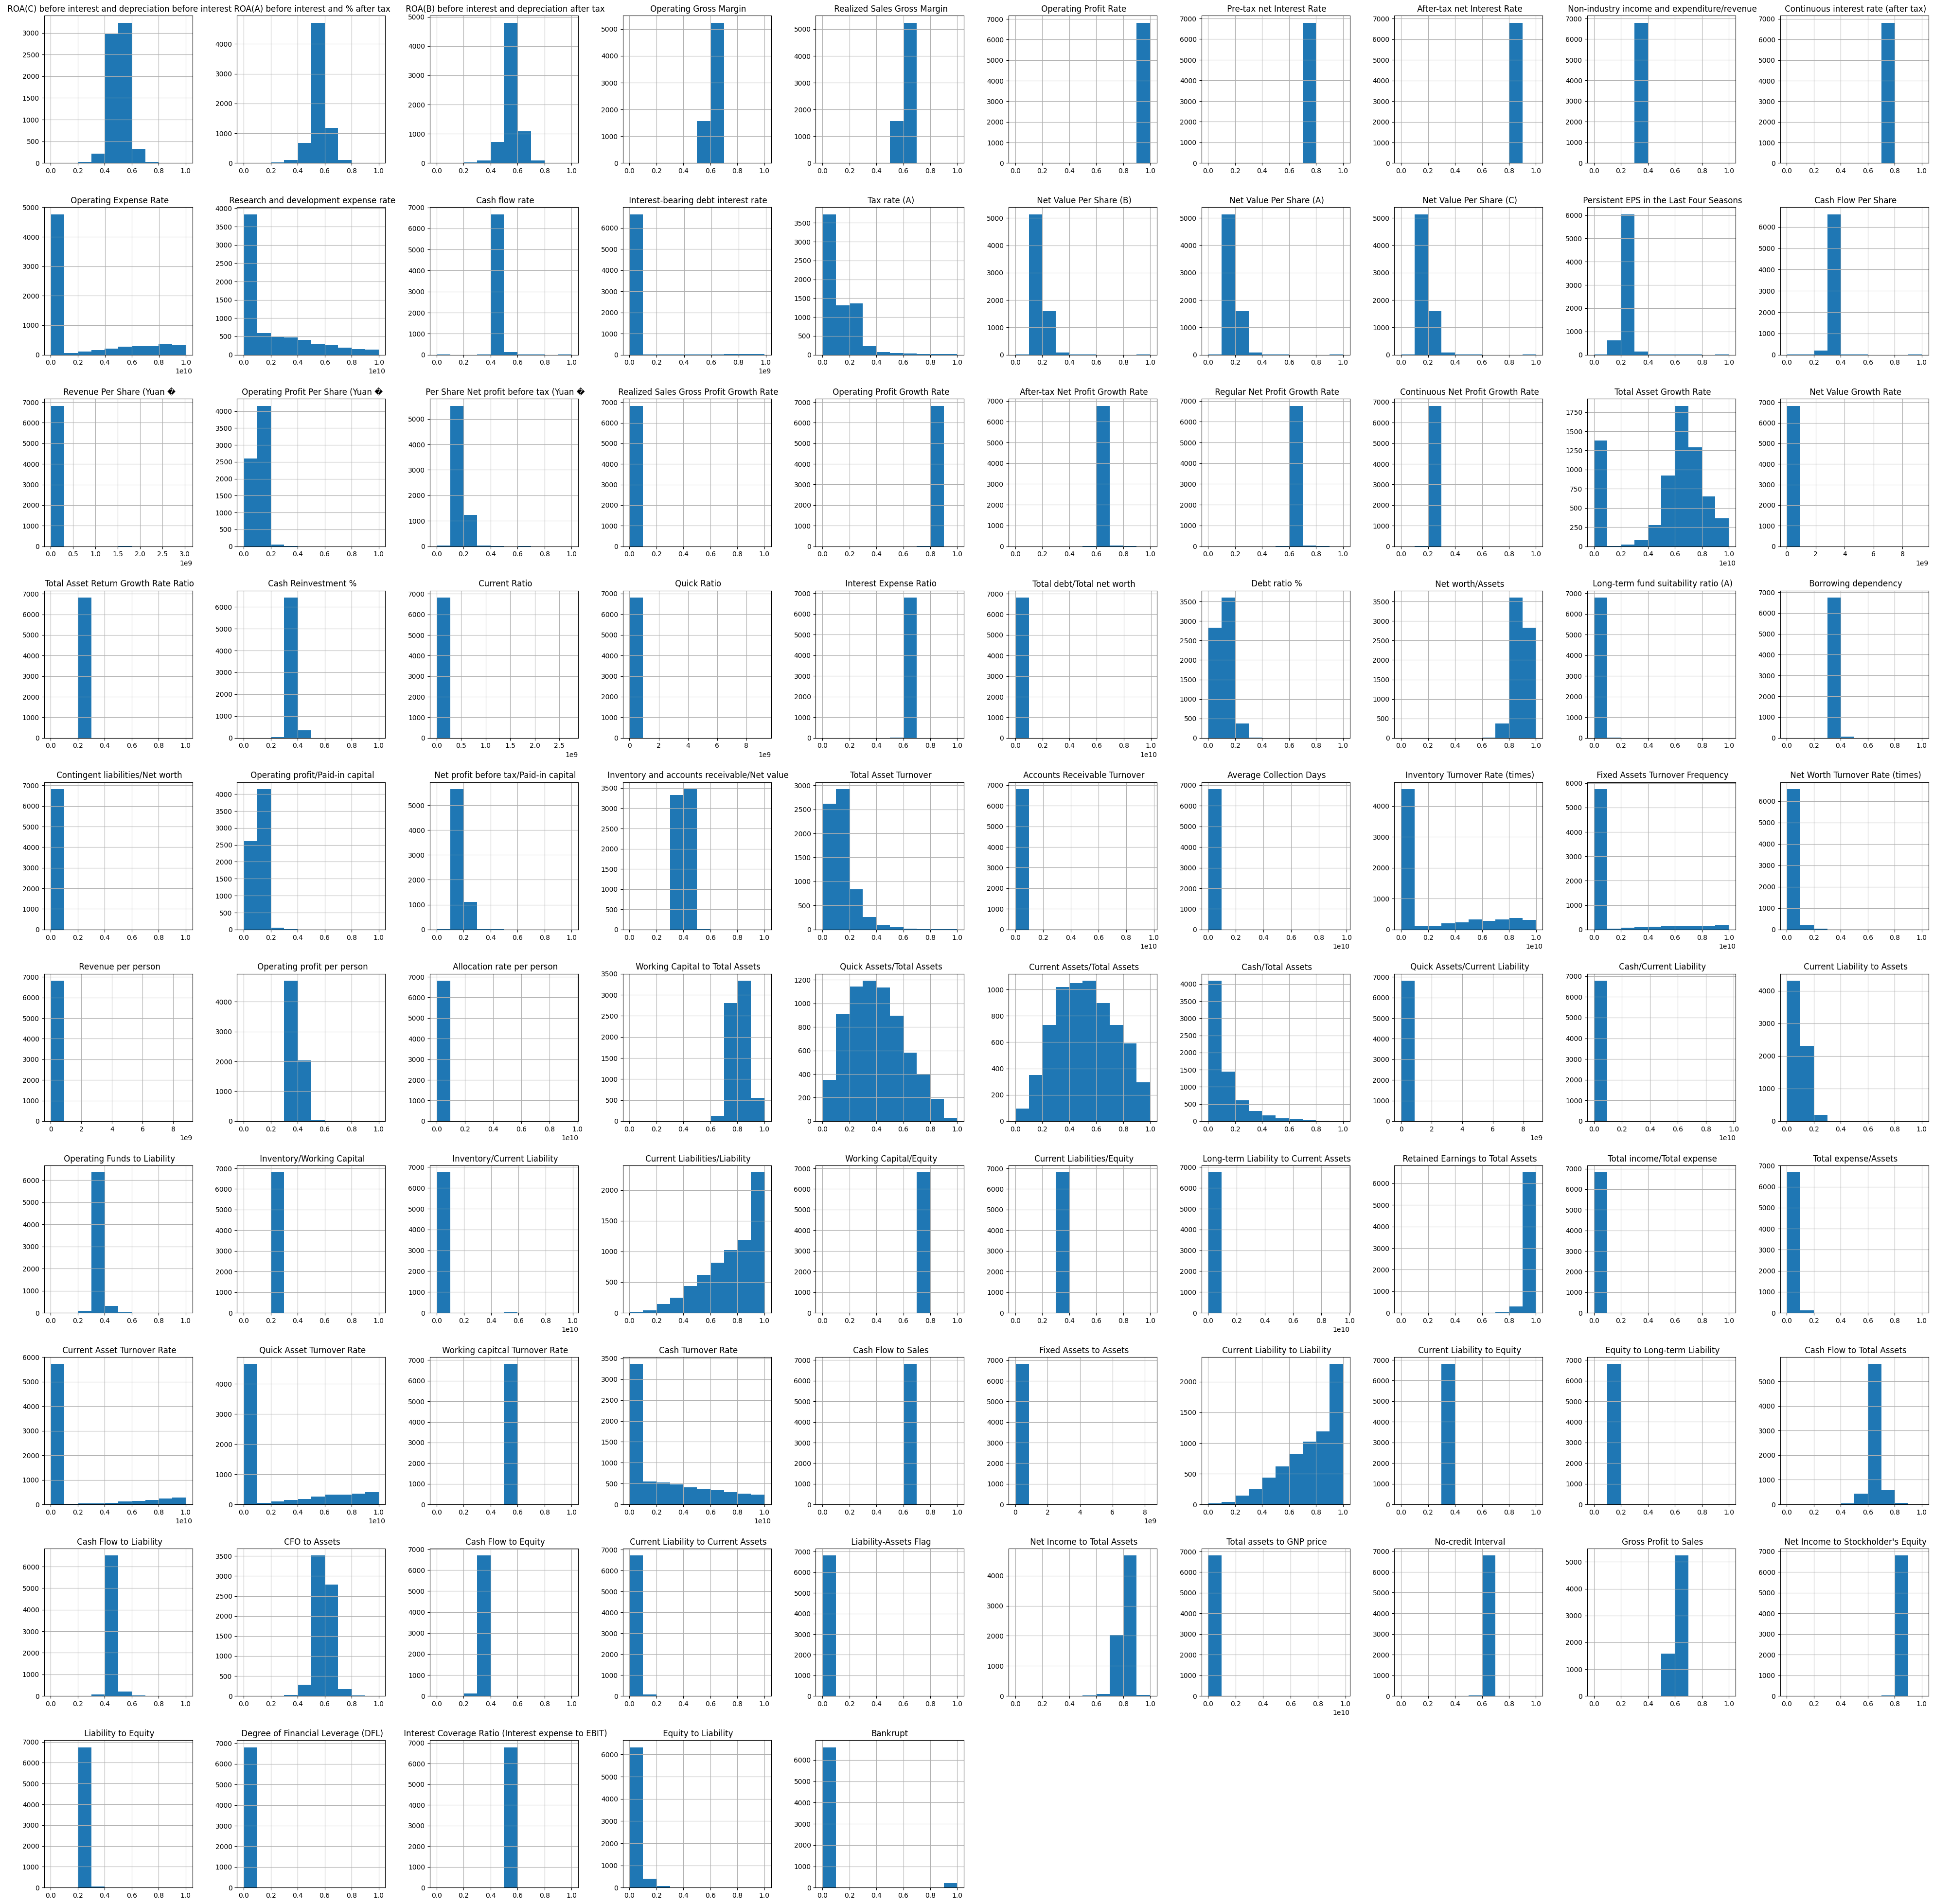

In [ ]:
#checking the data distribution
data.hist(figsize = (50,50))
plt.show()

---------------- above graph shows the data distribution of each column --------------------

In [ ]:
#checking all satistical values of columns
data.describe()

ROA(C) before interest and depreciation before interest  \
count                                        6819.000000          
mean                                            0.505180          
std                                             0.060686          
min                                             0.000000          
25%                                             0.476527          
50%                                             0.502706          
75%                                             0.535563          
max                                             1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)  ...  \
count                            6819.000000  ...   
mean                                0.781381  ...   
std                                 0.012679  ...   
min                                 0.000000  ...   
25%                                 0.781567  ...   
50%                                 0.781635  ...   
75%                                 0.781735  ...   
max 

In [ ]:
#features correlation with target
corr_m = data.corr()
target_corr = corr_m['Bankrupt']
print(target_corr)

 ROA(C) before interest and depreciation before interest   -0.260807
 ROA(A) before interest and % after tax                    -0.282941
 ROA(B) before interest and depreciation after tax         -0.273051
 Operating Gross Margin                                    -0.100043
 Realized Sales Gross Margin                               -0.099445
                                                              ...   
 Liability to Equity                                        0.166812
 Degree of Financial Leverage (DFL)                         0.010508
 Interest Coverage Ratio (Interest expense to EBIT)        -0.005509
 Equity to Liability                                       -0.083048
Bankrupt                                                    1.000000
Name: Bankrupt, Length: 95, dtype: float64


In [ ]:
#seeing all values with loop
for i in range (len(target_corr)):
  print (target_corr.index[i],'--------------------' ,target_corr.values[i])

 ROA(C) before interest and depreciation before interest -------------------- -0.2608065574846556
 ROA(A) before interest and % after tax -------------------- -0.2829405849206025
 ROA(B) before interest and depreciation after tax -------------------- -0.2730513178924456
 Operating Gross Margin -------------------- -0.10004324419396264
 Realized Sales Gross Margin -------------------- -0.09944524966460752
 Operating Profit Rate -------------------- -0.00022981739079024866
 Pre-tax net Interest Rate -------------------- -0.00851654789466911
 After-tax net Interest Rate -------------------- -0.008857223968693935
 Non-industry income and expenditure/revenue -------------------- -0.016592638076592097
 Continuous interest rate (after tax) -------------------- -0.008394858949194381
 Operating Expense Rate -------------------- -0.006083225509124868
 Research and development expense rate -------------------- -0.02423196835805958
 Cash flow rate -------------------- -0.07235555106439447
 Interes

<Axes: >

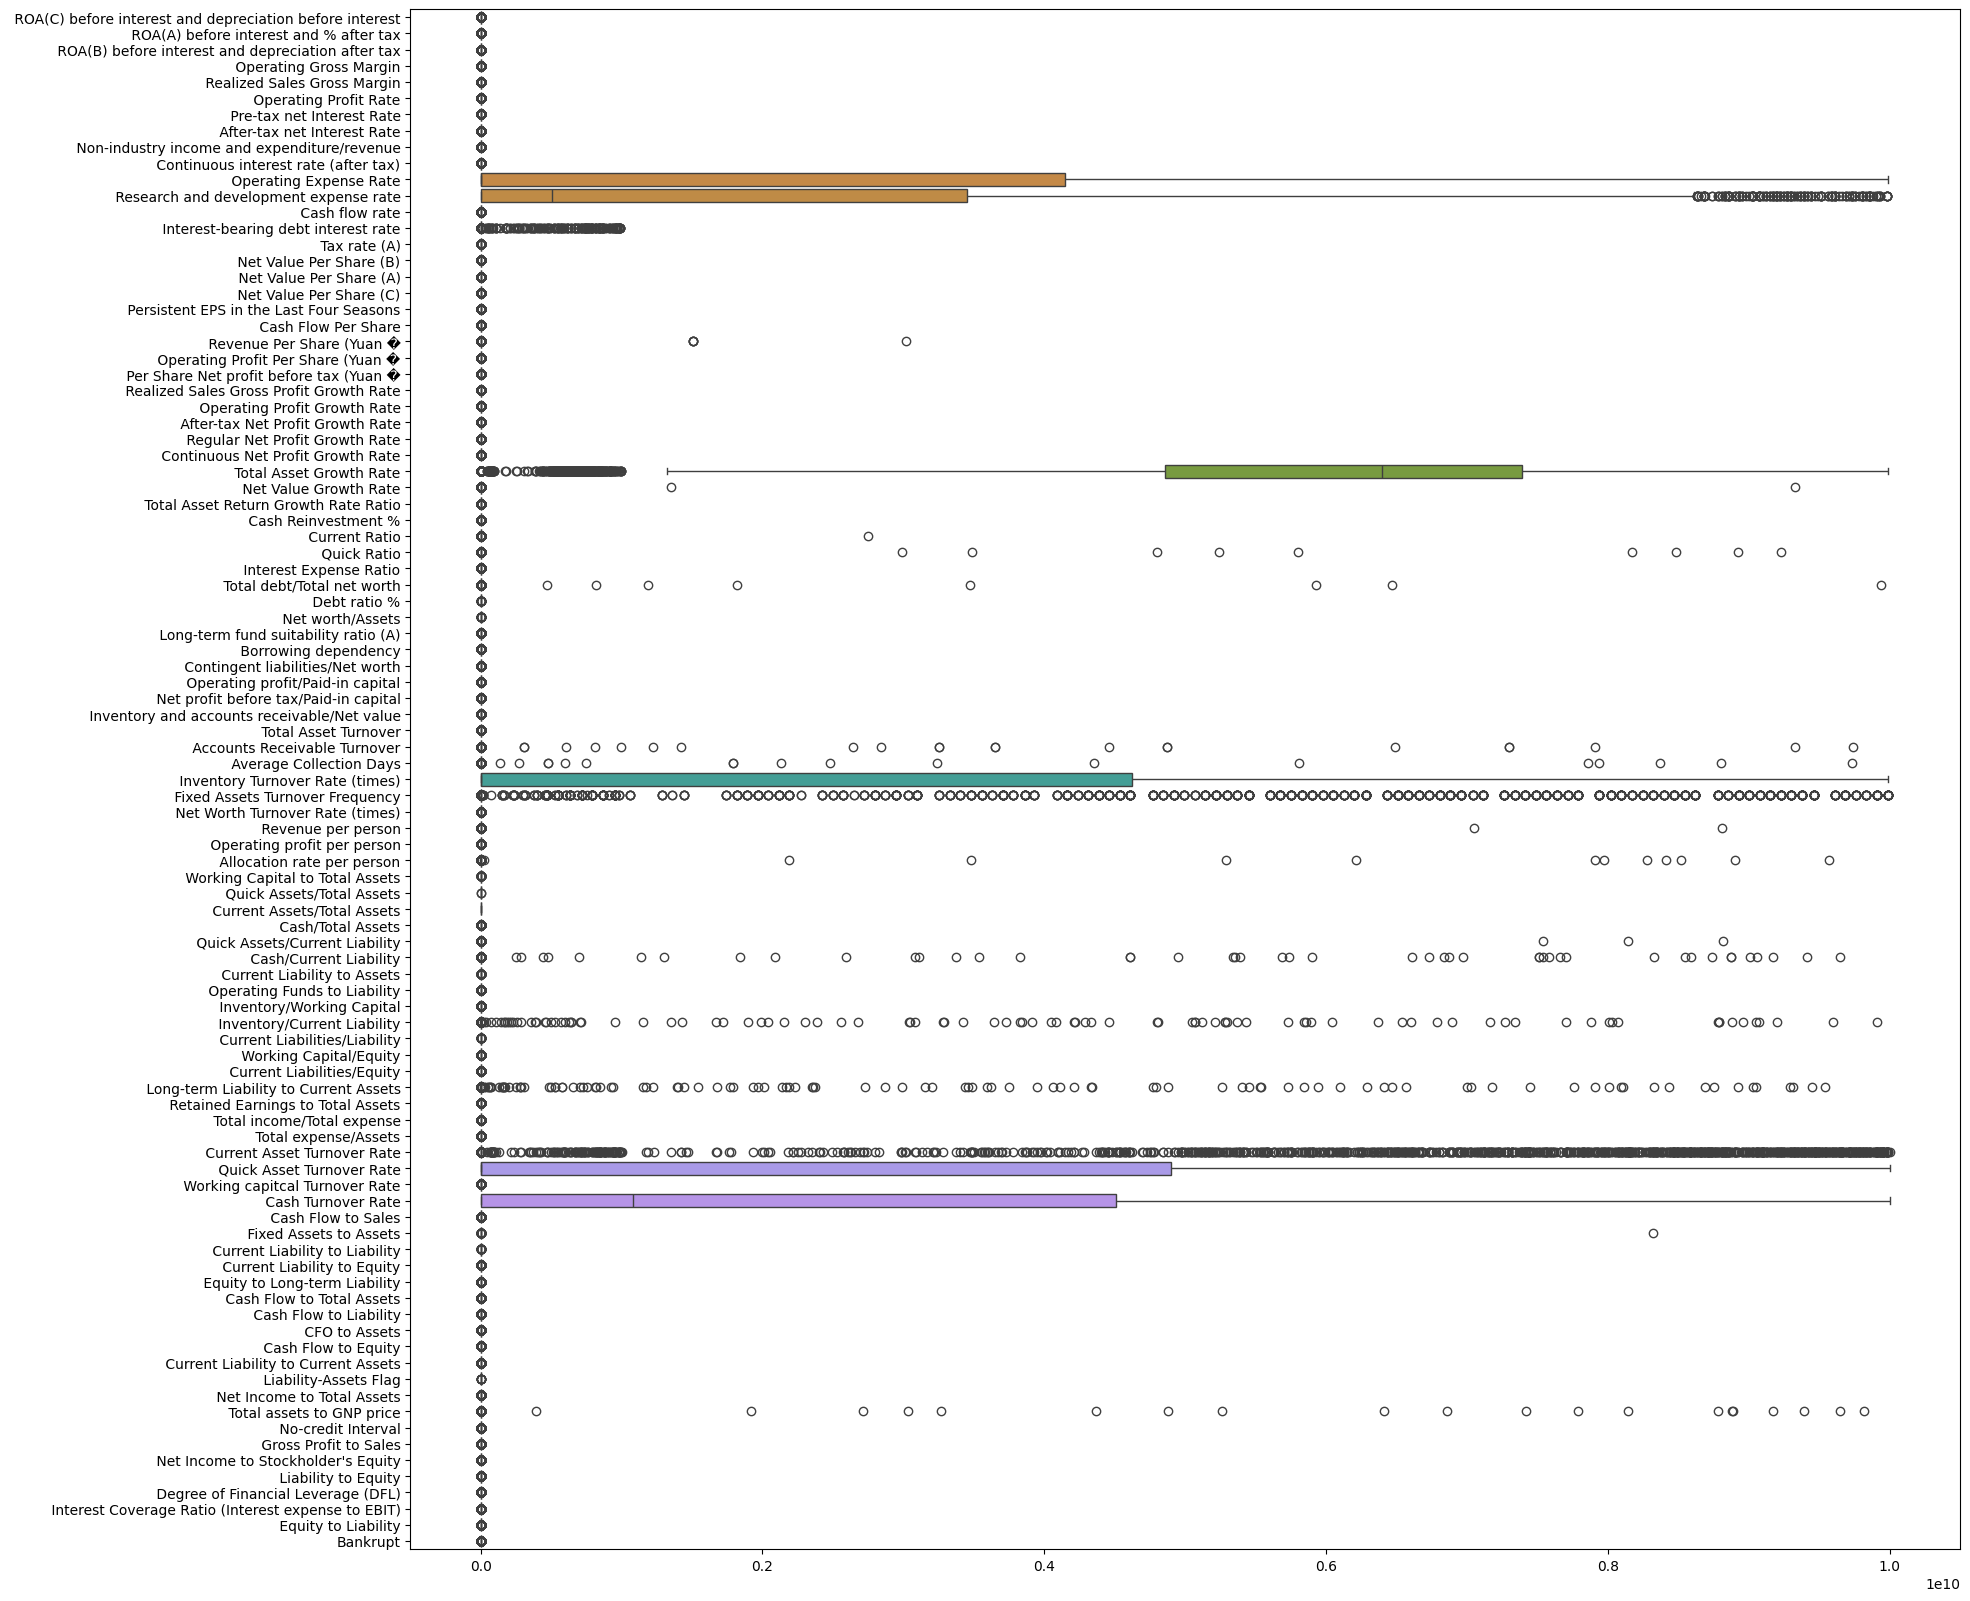

In [ ]:
#outerliers treatment
plt.figure(figsize = (20,20))
sns.boxplot(data, orient = 'h')

 ---Operating Expense Rate

 ---Research and development expense rate

----Total Asset Growth Rate

 ----Inventory Turnover Rate (times)

 -----Quick Asset Turnover Rate

 -----Cash Turnover Rate

 ----------- --------------only these columns are having data despersion----------------

Axes(0.125,0.11;0.775x0.77)


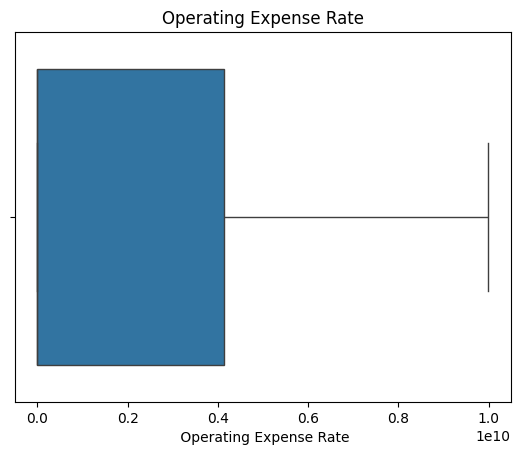

In [ ]:
#ploting the boxplot of data
plt.title ('Operating Expense Rate')
print(sns.boxplot(data[' Operating Expense Rate'],orient= 'h' ))

Axes(0.125,0.11;0.775x0.77)


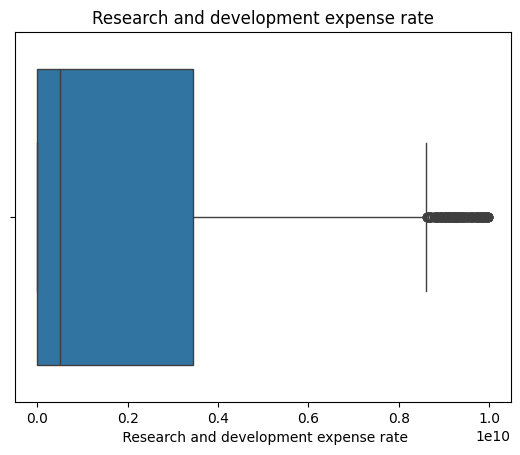

In [ ]:
plt.title ('Research and development expense rate')
print(sns.boxplot(data[' Research and development expense rate'],orient= 'h' ))

Axes(0.125,0.11;0.775x0.77)


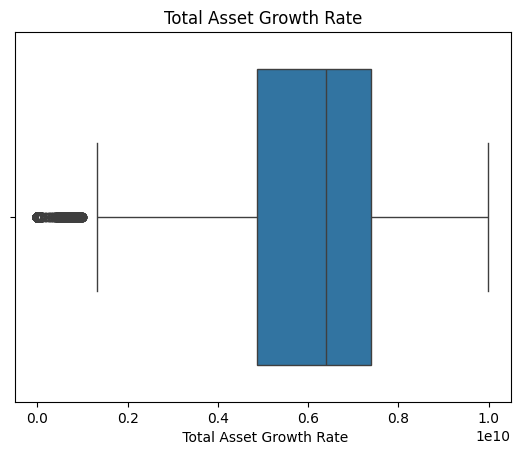

In [ ]:

plt.title ('Total Asset Growth Rate')
print(sns.boxplot(data[' Total Asset Growth Rate'],orient= 'h' ))

Axes(0.125,0.11;0.775x0.77)


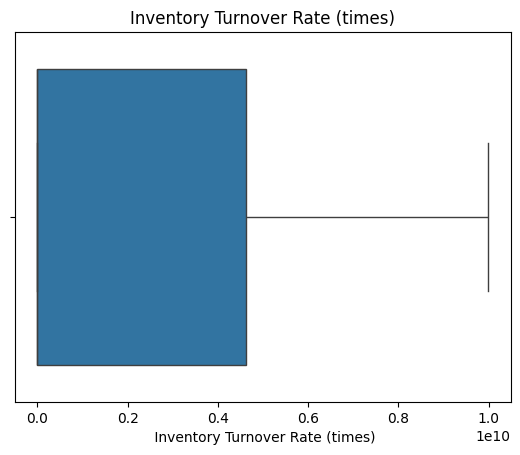

In [ ]:
plt.title ('Inventory Turnover Rate (times)')
print(sns.boxplot(data[' Inventory Turnover Rate (times)'],orient= 'h' ))

Axes(0.125,0.11;0.775x0.77)


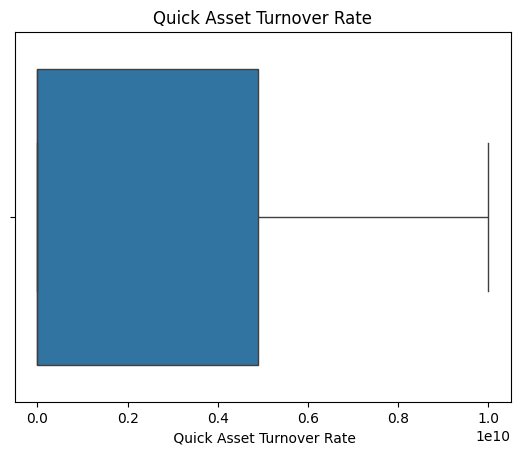

In [ ]:
plt.title ('Quick Asset Turnover Rate')
print(sns.boxplot(data[' Quick Asset Turnover Rate'],orient= 'h' ))

Axes(0.125,0.11;0.775x0.77)


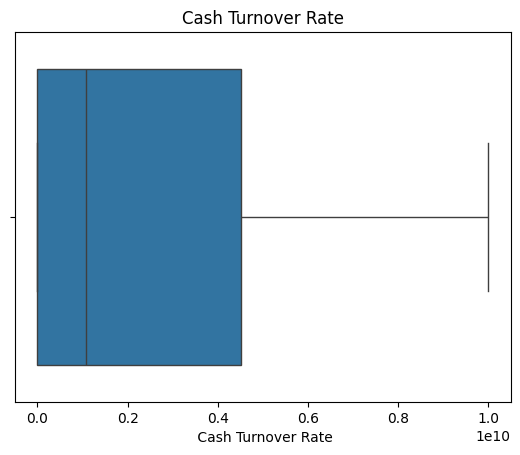

In [ ]:
plt.title ('Cash Turnover Rate')
print(sns.boxplot(data[' Cash Turnover Rate'],orient= 'h' ))

-----Research and development expense rate

----Total Asset Growth Rate

-------------------these two columns are having outliers ----------------

In [ ]:
#outlier treatment
coulmn_name = ' Research and development expense rate'
q1 = data[coulmn_name].quantile(0.25)
q3 = data[coulmn_name].quantile(0.25)
iqr = q3 -q1

ll = q1 -1.5 *iqr
ul = q3 + 1.5 * iqr

outliers = data[(data[coulmn_name] < ll) | (data[coulmn_name]> ul)]

median_v = data[coulmn_name].median()
data.loc[outliers.index,coulmn_name] = median_v

coulmn_name = ' Total Asset Growth Rate'
q1 = data[coulmn_name].quantile(0.25)
q3 = data[coulmn_name].quantile(0.25)
iqr = q3 -q1

ll = q1 -1.5 *iqr
ul = q3 + 1.5 * iqr

outliers = data[(data[coulmn_name] < ll) | (data[coulmn_name]> ul)]

median_v = data[coulmn_name].median()
data.loc[outliers.index,coulmn_name] = median_v

<Axes: >

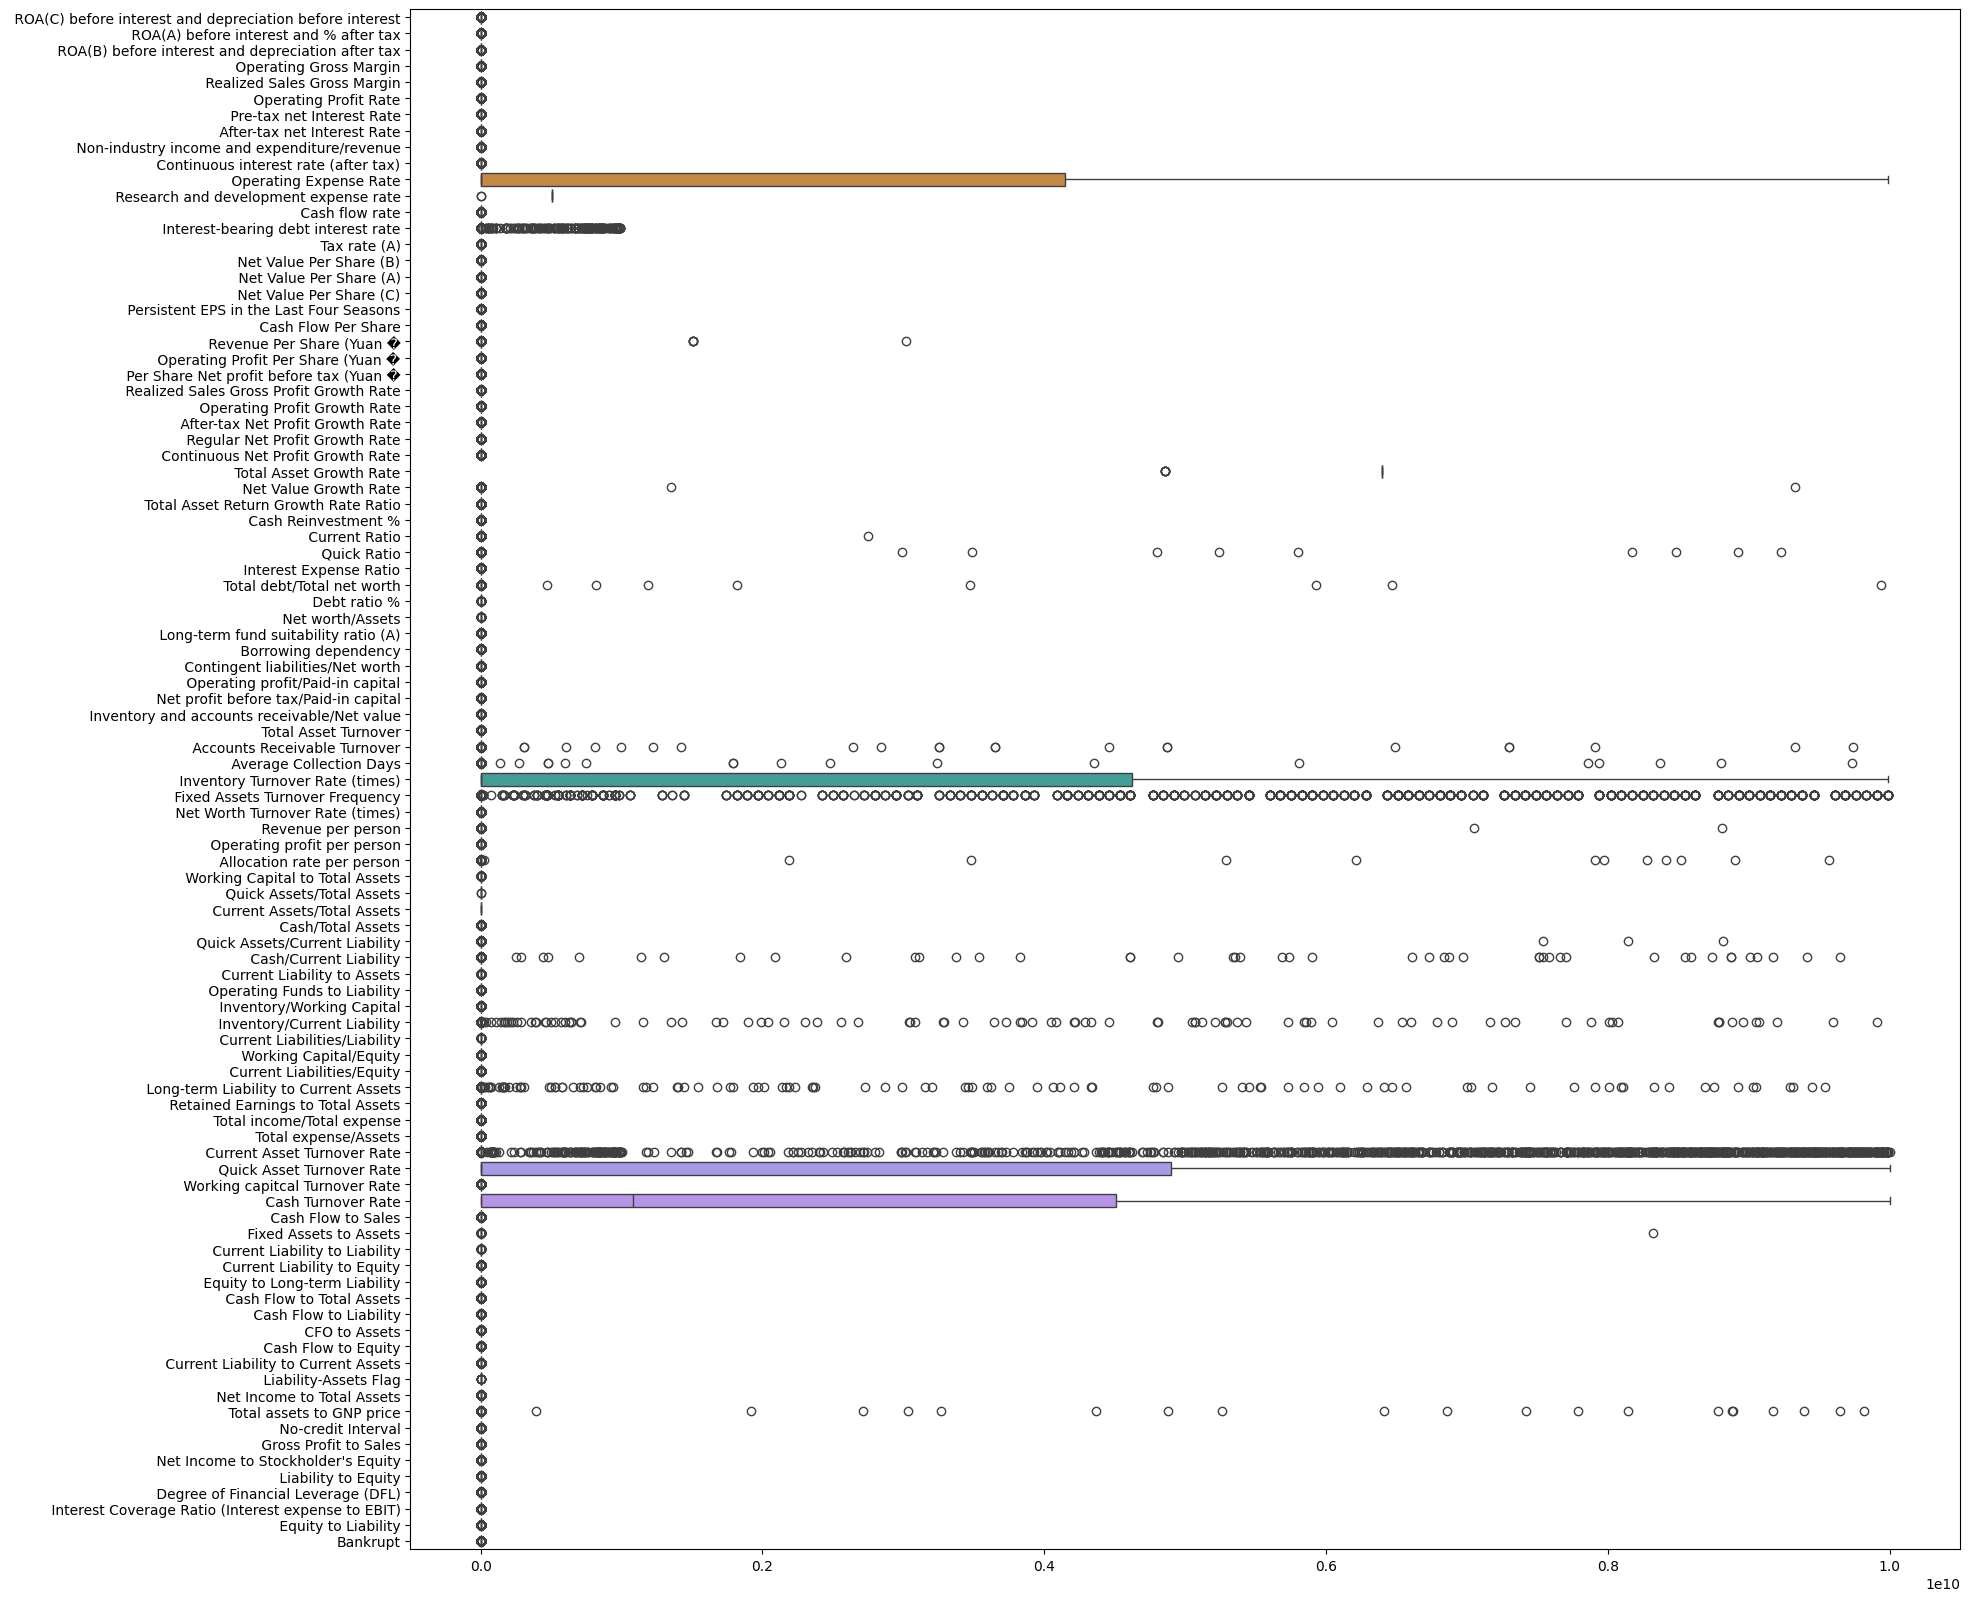

In [ ]:
#checking the outliers
plt.figure(figsize = (20,20))
sns.boxplot(data, orient = 'h')

------------------ no outliers are there in the data ---------------------

In [ ]:
# deviding the data on the basis of dependent and independent variables
features = data.iloc[:,:-1]
target = data.iloc[:,-1]
print("Independent variables are having ",features.shape[1],'columns')

Independent variables are having  94 columns


<Axes: >

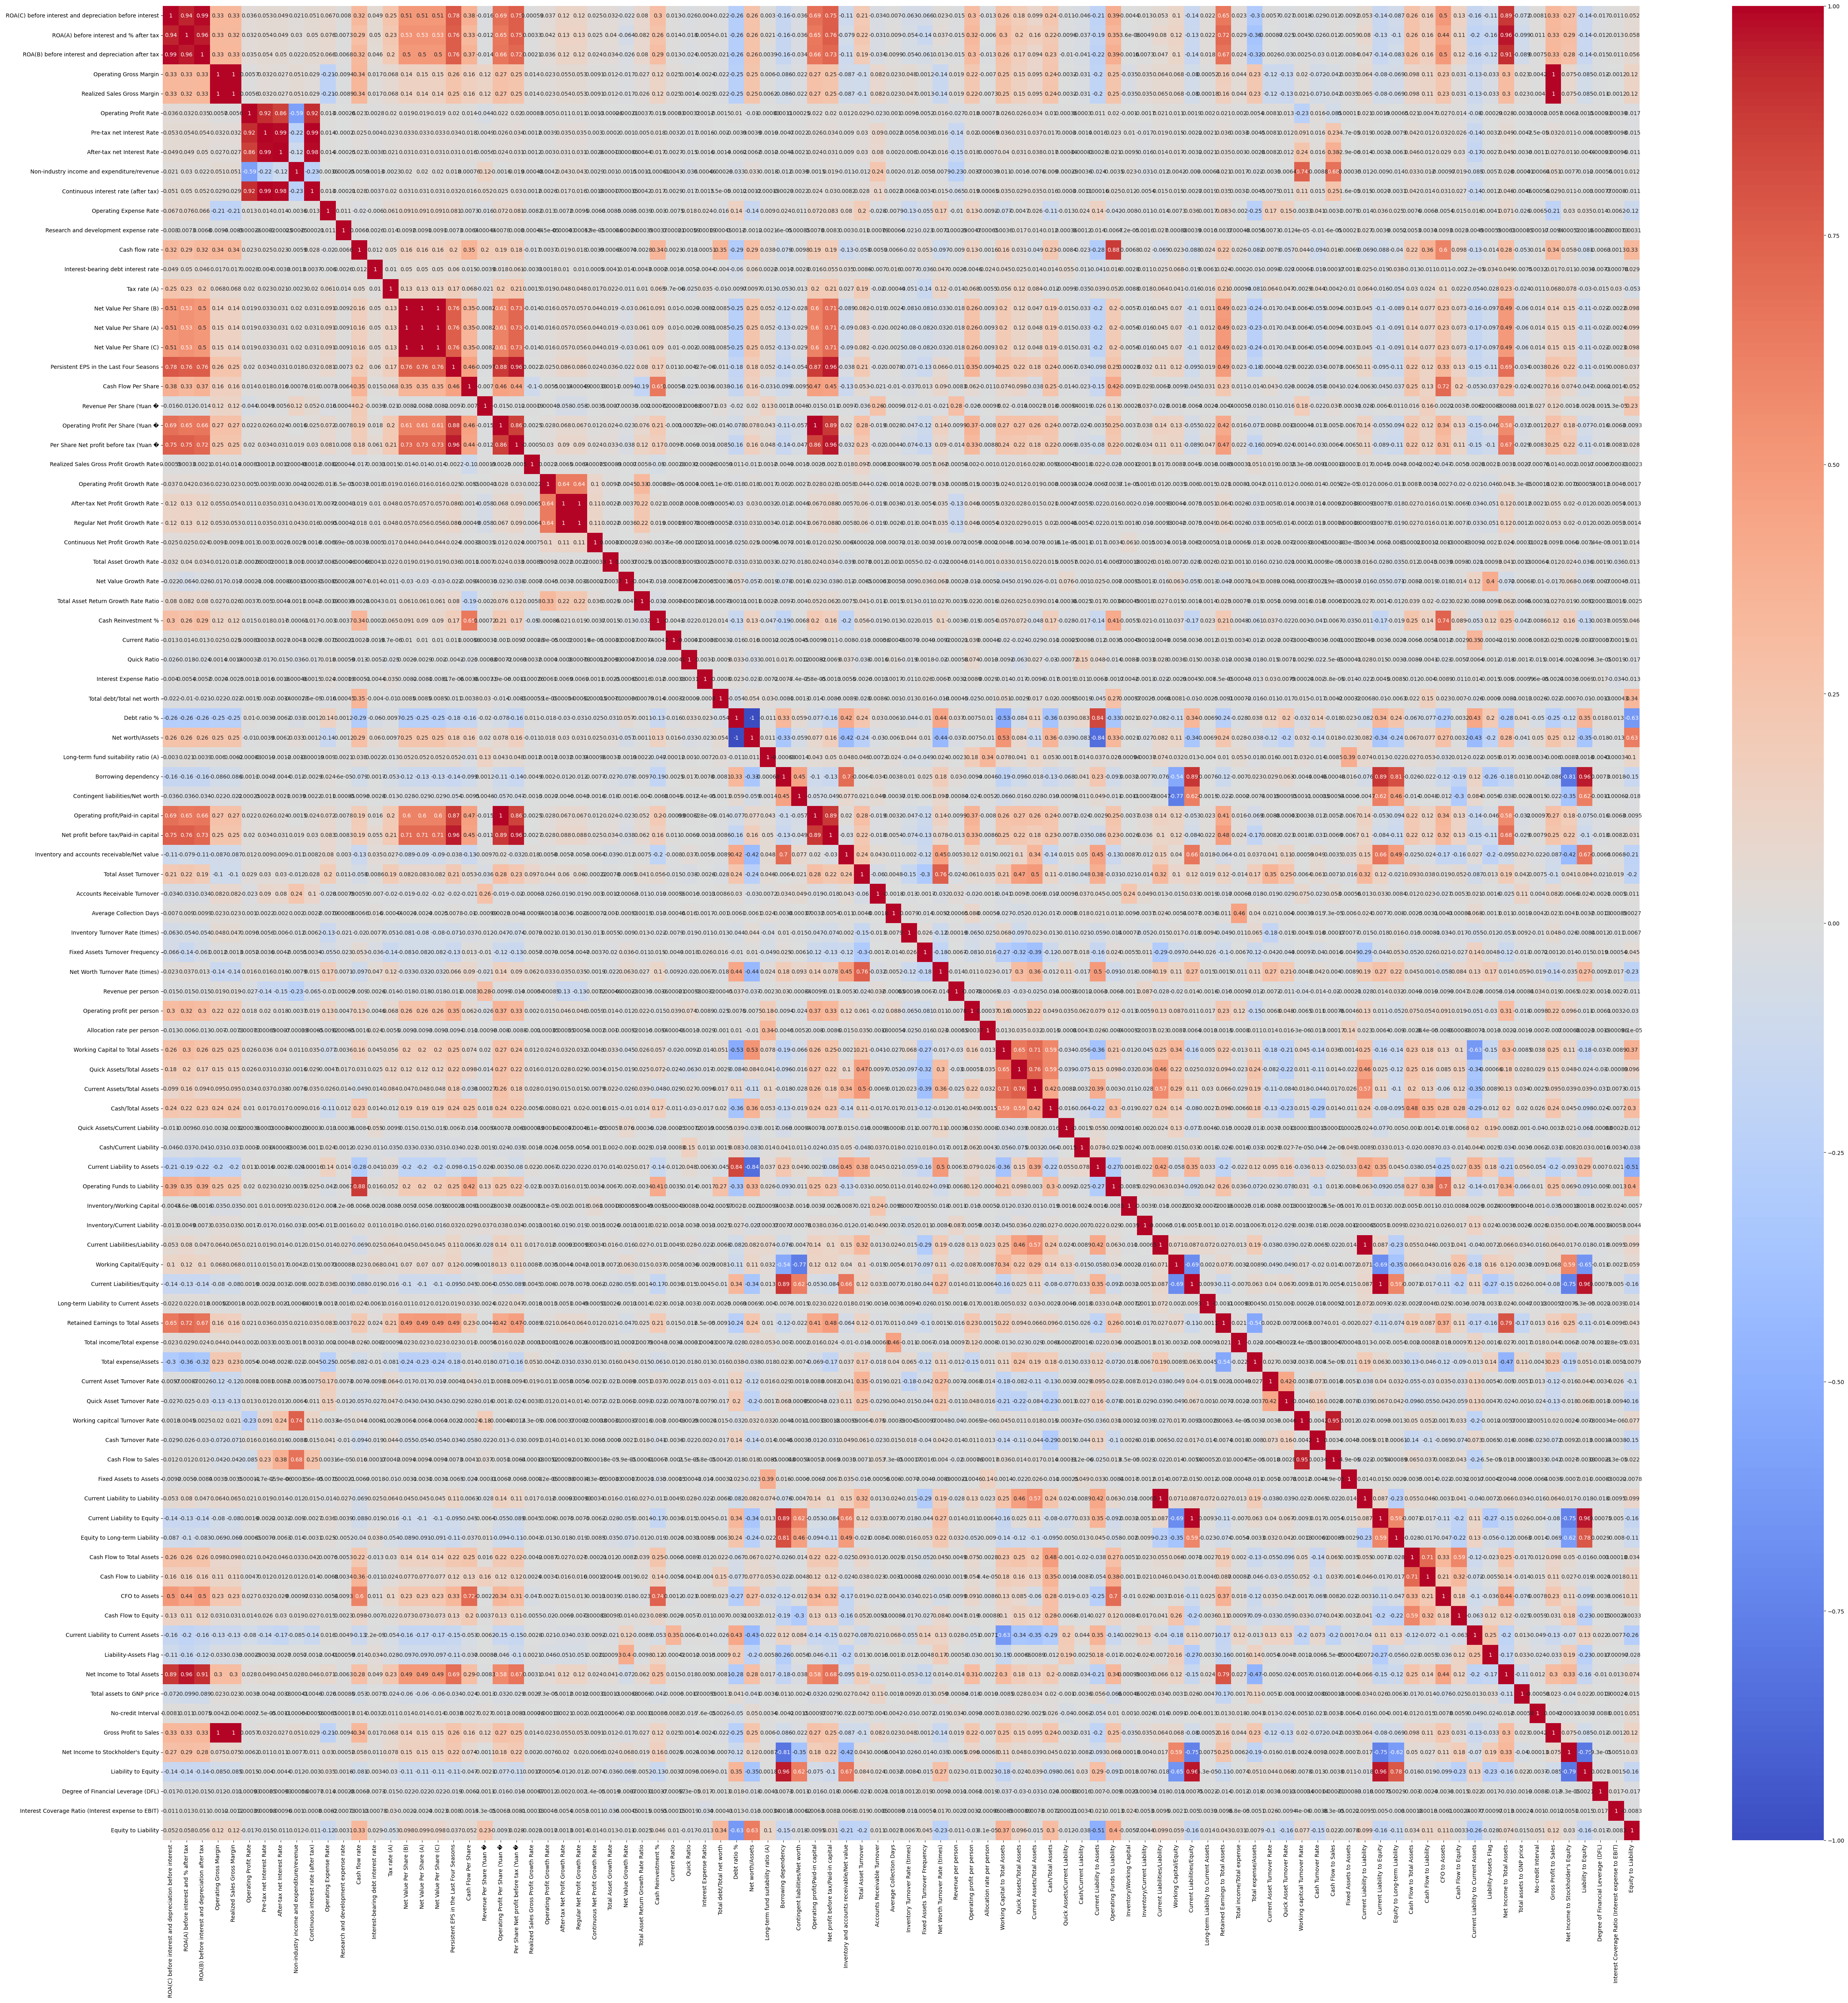

In [ ]:
#multicollineairty check
plt.figure(figsize=(60,60))
sns.heatmap(features.corr(), annot=True, cmap='coolwarm')

---------------------the data is having positive and negative multicollinearity ---------------------

In [ ]:
!pip install statsmodels scikit-learn

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#multicolinearity treatment using VIF method
vif_data = pd.DataFrame()
vif_data['feature'] = features.columns

#calculating vif for each feature
vif_data['VIF'] = [variance_inflation_factor(features.values , i)
                          for i in range(len(features.columns))]

print(vif_data)

                                              feature           VIF
0    ROA(C) before interest and depreciation befor...  6.894665e+01
1              ROA(A) before interest and % after tax  4.355752e+01
2    ROA(B) before interest and depreciation after...  1.026729e+02
3                              Operating Gross Margin  5.933399e+07
4                         Realized Sales Gross Margin  1.076139e+03
..                                                ...           ...
89                 Net Income to Stockholder's Equity  2.956856e+04
90                                Liability to Equity  4.700377e+02
91                 Degree of Financial Leverage (DFL)  1.004802e+00
92   Interest Coverage Ratio (Interest expense to ...  1.008490e+00
93                                Equity to Liability  3.131483e+00

[94 rows x 2 columns]


In [ ]:
# all rows analysis
pd.set_option('display.max_rows', None)

print(vif_data)

                                              feature           VIF
0    ROA(C) before interest and depreciation befor...  6.894665e+01
1              ROA(A) before interest and % after tax  4.355752e+01
2    ROA(B) before interest and depreciation after...  1.026729e+02
3                              Operating Gross Margin  5.933399e+07
4                         Realized Sales Gross Margin  1.076139e+03
5                               Operating Profit Rate  2.679566e+08
6                           Pre-tax net Interest Rate  1.018060e+08
7                         After-tax net Interest Rate  1.820858e+03
8         Non-industry income and expenditure/revenue  1.616029e+07
9                Continuous interest rate (after tax)  3.381291e+02
10                             Operating Expense Rate  1.250108e+00
11              Research and development expense rate  1.003140e+00
12                                     Cash flow rate  7.601315e+00
13                Interest-bearing debt interest

----------------removing the columns having high VIF ---------------------

In [ ]:
#dropping columns having high vif
high_vif = vif_data[vif_data['VIF'] >500]['feature']
print(high_vif.shape)
features = features.drop(columns = high_vif)

(22,)


ROA(C) before interest and depreciation before interest  \
0                                           0.370594          
1                                           0.464291          
2                                           0.426071          
3                                           0.399844          
4                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985             1.256970e-04   
1                               0.781506             2.897850e-04   
2                               0.780284             2.361300e-04   
3                               0.781241             1.078890e-04   
4                               0.781550             7.890000e+09   

    Research and development expense rate   Cash flow rate  \
0                             509000000.0         0.458143   
1                             509000000.0         0.461867   
2                             509000000.0         0.458521   
3                             509000000.0         0.465705   
4                             509000000.0         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000725            0.0   
1                              0.000647            0.0   
2                              0.000790            0.0   
3                              0.000449            0.0   
4                              0.000686            0.0   

    Persistent EPS in the Last Four Seasons  ...   Cash Flow to Equity  \
0                                  0.169141  ...              0.312905   
1                                  0.208944  ...              0.314163   
2                                  0.180581  ...              0.314515   
3                                  0.193722  ...              0.302382   
4                                  0.212537  ...              0.311567   

    Current Liability to Current Assets   Liability-Assets Flag  \
0                              0.118250                       0   
1                              0.047775                       0   
2                              0.025346                       0   
3                              0.067250                       0   
4                              0.047725                       0   

    Net Income to Total Assets   Total assets to GNP price  \
0                     0.716845                    0.009219   
1                     0.795297                    0.008323   
2                     0.774670                    0.040003   
3                     0.739555                    0.003252   
4                     0.795016                    0.003878   

    No-credit Interval   Liability to Equity  \
0             0.622879              0.290202   
1             0.623652              0.283846   
2             0.623841              0.290189   
3             0.622929              0.281721   
4             0.623521              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Equity to Liability  
0                         

In [ ]:
print('after multicollinearity handling dataset is having ',features.shape[1],'columns')

after multicollinearity handling dataset is having  72 columns


------------------VIF data is clean not showing multicolinearity between the features -------------------

In [ ]:
#target column data distribution
print(target.value_counts())
print()
print(target.value_counts(normalize = True))
print()
print('unique values',target.unique())

Bankrupt
0    6599
1     220
Name: count, dtype: int64

Bankrupt
0    0.967737
1    0.032263
Name: proportion, dtype: float64

unique values [1 0]


:----------------- target variable is having imbalanced data -----------------

-----------------balancing the data using SMOTE --------------------

In [ ]:
#spliting the data
from sklearn.model_selection import train_test_split
x= features
y= target
x_train,x_test,y_train,y_test = train_test_split(x,y ,train_size= 0.7,random_state = 42)

In [ ]:
#y_train column data distribution
print(y_train.value_counts())
print()
print(y_train.value_counts(normalize = True))

Bankrupt
0    4631
1     142
Name: count, dtype: int64

Bankrupt
0    0.970249
1    0.029751
Name: proportion, dtype: float64


In [ ]:
#y_test column data distribution
print(y_test.value_counts())
print()
print(y_test.value_counts(normalize = True))

Bankrupt
0    1968
1      78
Name: count, dtype: int64

Bankrupt
0    0.961877
1    0.038123
Name: proportion, dtype: float64


In [ ]:
!pip install imbalanced_learn

In [ ]:
#fixing imblanced data set with smote
healthy = data[data["Bankrupt"]==0]
bankrupt  = data [data["Bankrupt"]== 1]

print('previous shape ',bankrupt.shape,healthy.shape)

from imblearn.combine import SMOTETomek

smk = SMOTETomek(random_state = 42)
x_sm,y_sm = smk.fit_resample(x_train,y_train)

print('new shap ',x_sm.shape,y_sm.shape)

previous shape  (220, 95) (6599, 95)
new shap  (8968, 72) (8968,)


#Model Building

#Logistic Regression

In [ ]:
# import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,classification_report

# LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(x_sm, y_sm)

# Prediction
y_lr = log.predict(x_test)

#accuracy score
acc = accuracy_score(y_test, y_lr)
log_reg = acc *100
print("Logistic Regression model accuracy (in %):", log_reg)

# confusion matrix
from sklearn.metrics import confusion_matrix

cnf_matrix= confusion_matrix(y_test,y_lr)
print(cnf_matrix)

Logistic Regression model accuracy (in %): 58.65102639296188
[[1161  807]
 [  39   39]]


In [ ]:
#classification_report
print(classification_report(y_test,y_lr))

              precision    recall  f1-score   support

           0       0.97      0.59      0.73      1968
           1       0.05      0.50      0.08        78

    accuracy                           0.59      2046
   macro avg       0.51      0.54      0.41      2046
weighted avg       0.93      0.59      0.71      2046



#Random Forest

In [ ]:
# import the necessary libraries
from sklearn.ensemble import RandomForestClassifier

#Random Forest
rf = RandomForestClassifier()
rf.fit(x_sm,y_sm)

# Prediction
y_rf = rf.predict(x_test)

#accuracy score
score_ = accuracy_score(y_test,y_rf)
rf_acc = score_ * 100
print('Random Forest model accuracy score is ',score_ * 100)

#confusion_matrix
rf_matrix = confusion_matrix(y_test,y_rf)
print(rf_matrix)

Random Forest model accuracy score is  95.89442815249268
[[1917   51]
 [  33   45]]


In [ ]:
#classification_report
classification = classification_report(y_test,y_rf)
print(classification)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1968
           1       0.46      0.53      0.49        78

    accuracy                           0.96      2046
   macro avg       0.72      0.75      0.73      2046
weighted avg       0.96      0.96      0.96      2046



#SVM

In [ ]:
# import the necessary libraries
from sklearn.svm import SVC
#from sklearn import metrics
from sklearn import svm
#SVM
clf = svm.SVC()
clf.fit(x_sm,y_sm)

# Prediction
y_svm =clf.predict(x_test)

#accuracy score
accuracy = accuracy_score(y_test,y_svm)
svm_acc = accuracy * 100
print("SVM model score is ",accuracy * 100)

# confusion matrix
print(confusion_matrix(y_test,y_svm))

SVM model score is  71.94525904203324
[[1432  536]
 [  38   40]]


In [ ]:
#classification_report
print(classification_report(y_test,y_svm))

              precision    recall  f1-score   support

           0       0.97      0.73      0.83      1968
           1       0.07      0.51      0.12        78

    accuracy                           0.72      2046
   macro avg       0.52      0.62      0.48      2046
weighted avg       0.94      0.72      0.81      2046



#KNN

In [ ]:
# import the necessary libraries
from sklearn.neighbors import KNeighborsClassifier

#KNN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_sm,y_sm)

# Prediction
y_knn = knn.predict(x_test)

#accuracy score
accuracy = accuracy_score(y_test,y_knn)
knn_acc = accuracy * 100
print("KNN model score is ",accuracy * 100)

# confusion matrix
print(confusion_matrix(y_test,y_knn))

KNN model score is  80.64516129032258
[[1622  346]
 [  50   28]]


In [ ]:
#classification_report
print(classification_report(y_test,y_knn))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      1968
           1       0.07      0.36      0.12        78

    accuracy                           0.81      2046
   macro avg       0.52      0.59      0.51      2046
weighted avg       0.94      0.81      0.86      2046



#Naive Bayes

In [ ]:
# import the necessary libraries
from sklearn.naive_bayes import GaussianNB

#Naive Bayes
model = GaussianNB()
model.fit(x_sm, y_sm)

#prediction
y_nb = model.predict(x_test)

#accuracy
score = accuracy_score(y_test,y_nb)
nb_acc = score *100
print("Naive Bayes model score is ",score * 100)

#confusion matrix
cnf_matrix= confusion_matrix(y_test,y_nb)
print(cnf_matrix)


Naive Bayes model score is  7.966764418377322
[[  88 1880]
 [   3   75]]


In [ ]:
#classification_report
print(classification_report(y_test,y_nb))

              precision    recall  f1-score   support

           0       0.97      0.04      0.09      1968
           1       0.04      0.96      0.07        78

    accuracy                           0.08      2046
   macro avg       0.50      0.50      0.08      2046
weighted avg       0.93      0.08      0.09      2046



#XG-boost

In [ ]:
!pip install xgboost

In [ ]:
# import the necessary libraries
import xgboost  as xgb

#XG - boost
xg_boost = xgb.XGBClassifier()
xg_boost.fit(x_sm ,y_sm)

#prediction
y_xg = xg_boost.predict(x_test)

#accuracy
score = accuracy_score(y_test,y_xg)
xg_acc = score * 100
print("XG - boost model score is ",score * 100)

#confusion_matrix
cnf_matrix= confusion_matrix(y_test,y_xg)
print(cnf_matrix)

XG - boost model score is  95.99217986314761
[[1930   38]
 [  44   34]]


In [ ]:
#classification_report
print(classification_report(y_test,y_xg))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1968
           1       0.47      0.44      0.45        78

    accuracy                           0.96      2046
   macro avg       0.72      0.71      0.72      2046
weighted avg       0.96      0.96      0.96      2046



#Light GBM

In [ ]:
!pip install lightgbm

In [ ]:
# import the necessary libraries
import lightgbm as lgb

#Light GBM
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_sm,y_sm)

#prediction
y_lgb = lgb_model.predict(x_test)

#accuracy
score = accuracy_score(y_test,y_lgb)
lgb_acc = score *100
print("Light GBM model score is ",score * 100)

#confusion_matrix
cnf_matrix= confusion_matrix(y_test,y_lgb)
print(cnf_matrix)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4484, number of negative: 4484
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004699 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17607
[LightGBM] [Info] Number of data points in the train set: 8968, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Light GBM model score is  95.74780058651027
[[1925   43]
 [  44   34]]


In [ ]:
#classification_report
print(classification_report(y_test,y_lgb))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1968
           1       0.44      0.44      0.44        78

    accuracy                           0.96      2046
   macro avg       0.71      0.71      0.71      2046
weighted avg       0.96      0.96      0.96      2046



#Decision Tree

In [ ]:
# import the necessary libraries
from sklearn.tree import DecisionTreeClassifier

#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_sm,y_sm)

#prediction
y_dt = dt.predict(x_test)

#accuracy
score = accuracy_score(y_test,y_lgb)
dt_acc = score * 100
print("Decision Tree model score is ",score * 100)

#confusion_matrix
cnf_matrix= confusion_matrix(y_test,y_dt)
print(cnf_matrix)

Decision Tree model score is  95.74780058651027
[[1855  113]
 [  45   33]]


In [ ]:
#classification_report
print(classification_report(y_test,y_dt))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1968
           1       0.25      0.47      0.33        78

    accuracy                           0.93      2046
   macro avg       0.62      0.71      0.65      2046
weighted avg       0.95      0.93      0.94      2046



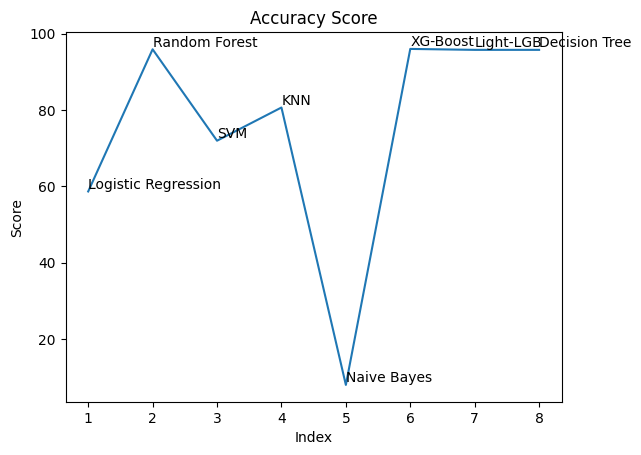

In [ ]:
x = range(1, 9)  # Assuming x-axis values are 1, 2, 3, 4
y = [log_reg,rf_acc,svm_acc,knn_acc,nb_acc,xg_acc,lgb_acc,dt_acc,]
label = ['Logistic Regression','Random Forest','SVM','KNN','Naive Bayes','XG-Boost','Light-LGB','Decision Tree']

# Plot
plt.plot(x, y)
plt.xlabel('Index')
plt.ylabel('Score')

for i, j, label in zip (x,y,label):
  plt.text(i,j,f'{label}',ha = 'left', va = 'bottom')
plt.title('Accuracy Score')
plt.show()


#After analysing all abovealgorithms I decided to go with Random Forest algorithm

# Applyting parameter tunning on Random Forest to improve the score further more

In [ ]:
#defining the parameter grid to search over
param_grid = {'n_estimators':[50,100,200],
              'max_depth':[None,10,20],
              'min_samples_split':[2,5,10],
              'min_samples_leaf':[1,2,4]}

#importing require libraries
from sklearn.model_selection import GridSearchCV

#performing grid search cv
grid_cv = GridSearchCV(estimator = rf,param_grid = param_grid , cv= 5, scoring = 'f1')
grid_cv.fit(x_sm,y_sm)

#get the best parameters
best_params = grid_cv.best_params_

#training the model with best parameters
best_rf_model = RandomForestClassifier(**best_params,random_state = 42)
best_rf_model.fit(x_sm,y_sm)

#prediction
y_rf_new = best_rf_model.predict(x_test)

#classification report
print(classification_report(y_test,y_rf_new))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1968
           1       0.46      0.55      0.50        78

    accuracy                           0.96      2046
   macro avg       0.72      0.76      0.74      2046
weighted avg       0.96      0.96      0.96      2046



In [ ]:
print('Best Parameters for tunning are :',best_params)

Best Parameters for tunning are : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
#confusion matrics
cnf_matrix= confusion_matrix(y_test,y_rf_new)
print(cnf_matrix)

[[1917   51]
 [  35   43]]


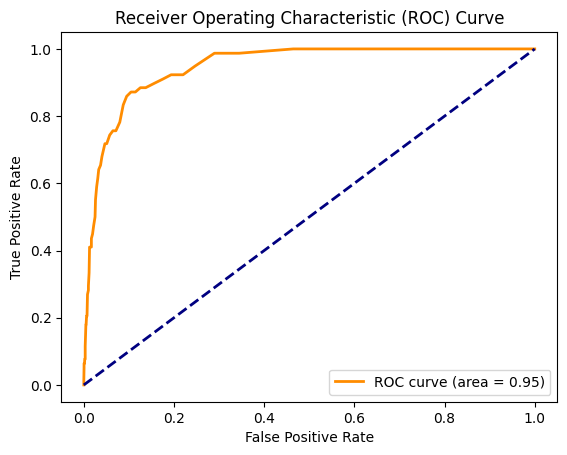

In [ ]:
# import the necessary libraries
from sklearn.metrics import roc_curve ,roc_auc_score

# Predict probabilities
y_probs = best_rf_model.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")


